In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
colors =["#FF5733", "#5BC0EB", "#FFC30D", "#32CD32", "#FF69B4", "#7D3C98", "#00FF00", "#0000FF", "#FFFF00", "#FF0000"]

In [2]:
df=pd.read_csv("shopping_trends_updated.csv")

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [5]:
df.shape


(3900, 18)

In [6]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
df=df.drop('Customer ID',axis=1)

In [8]:
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


<AxesSubplot:>

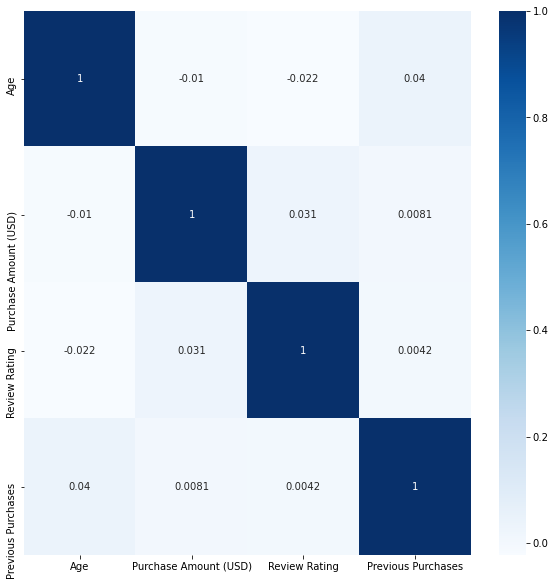

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

<AxesSubplot:>

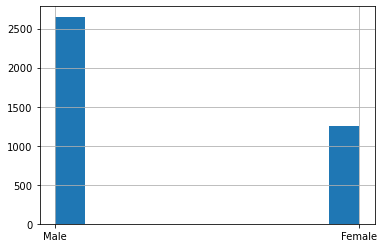

In [10]:
df['Gender'].hist()

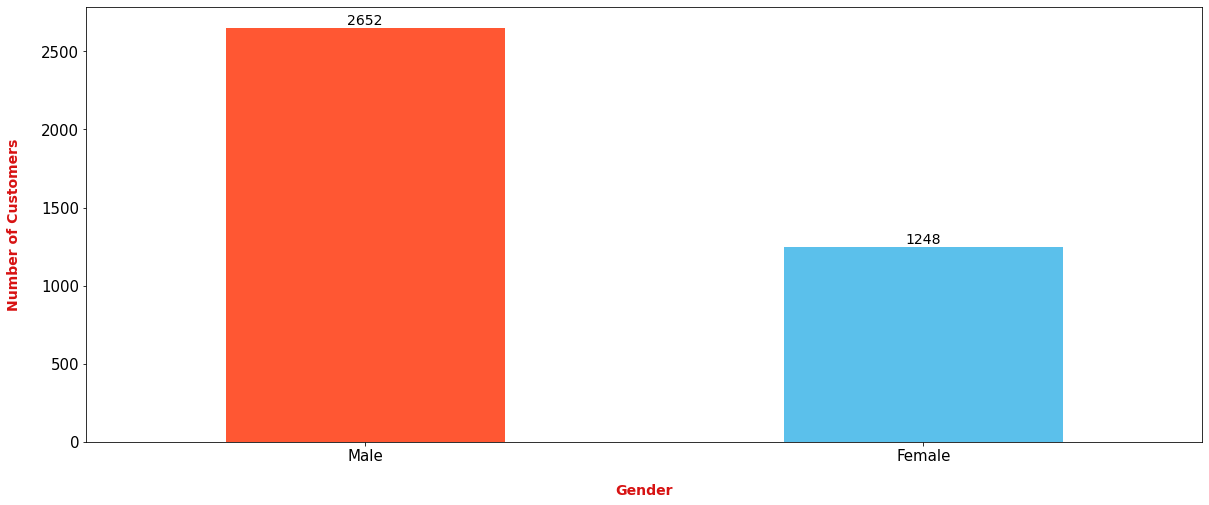

In [11]:
plt.figure(figsize = (20, 8))
ax = df["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Male', 'Female'))

plt.xlabel('Gender', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Customers', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), fontsize = 14,ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
    

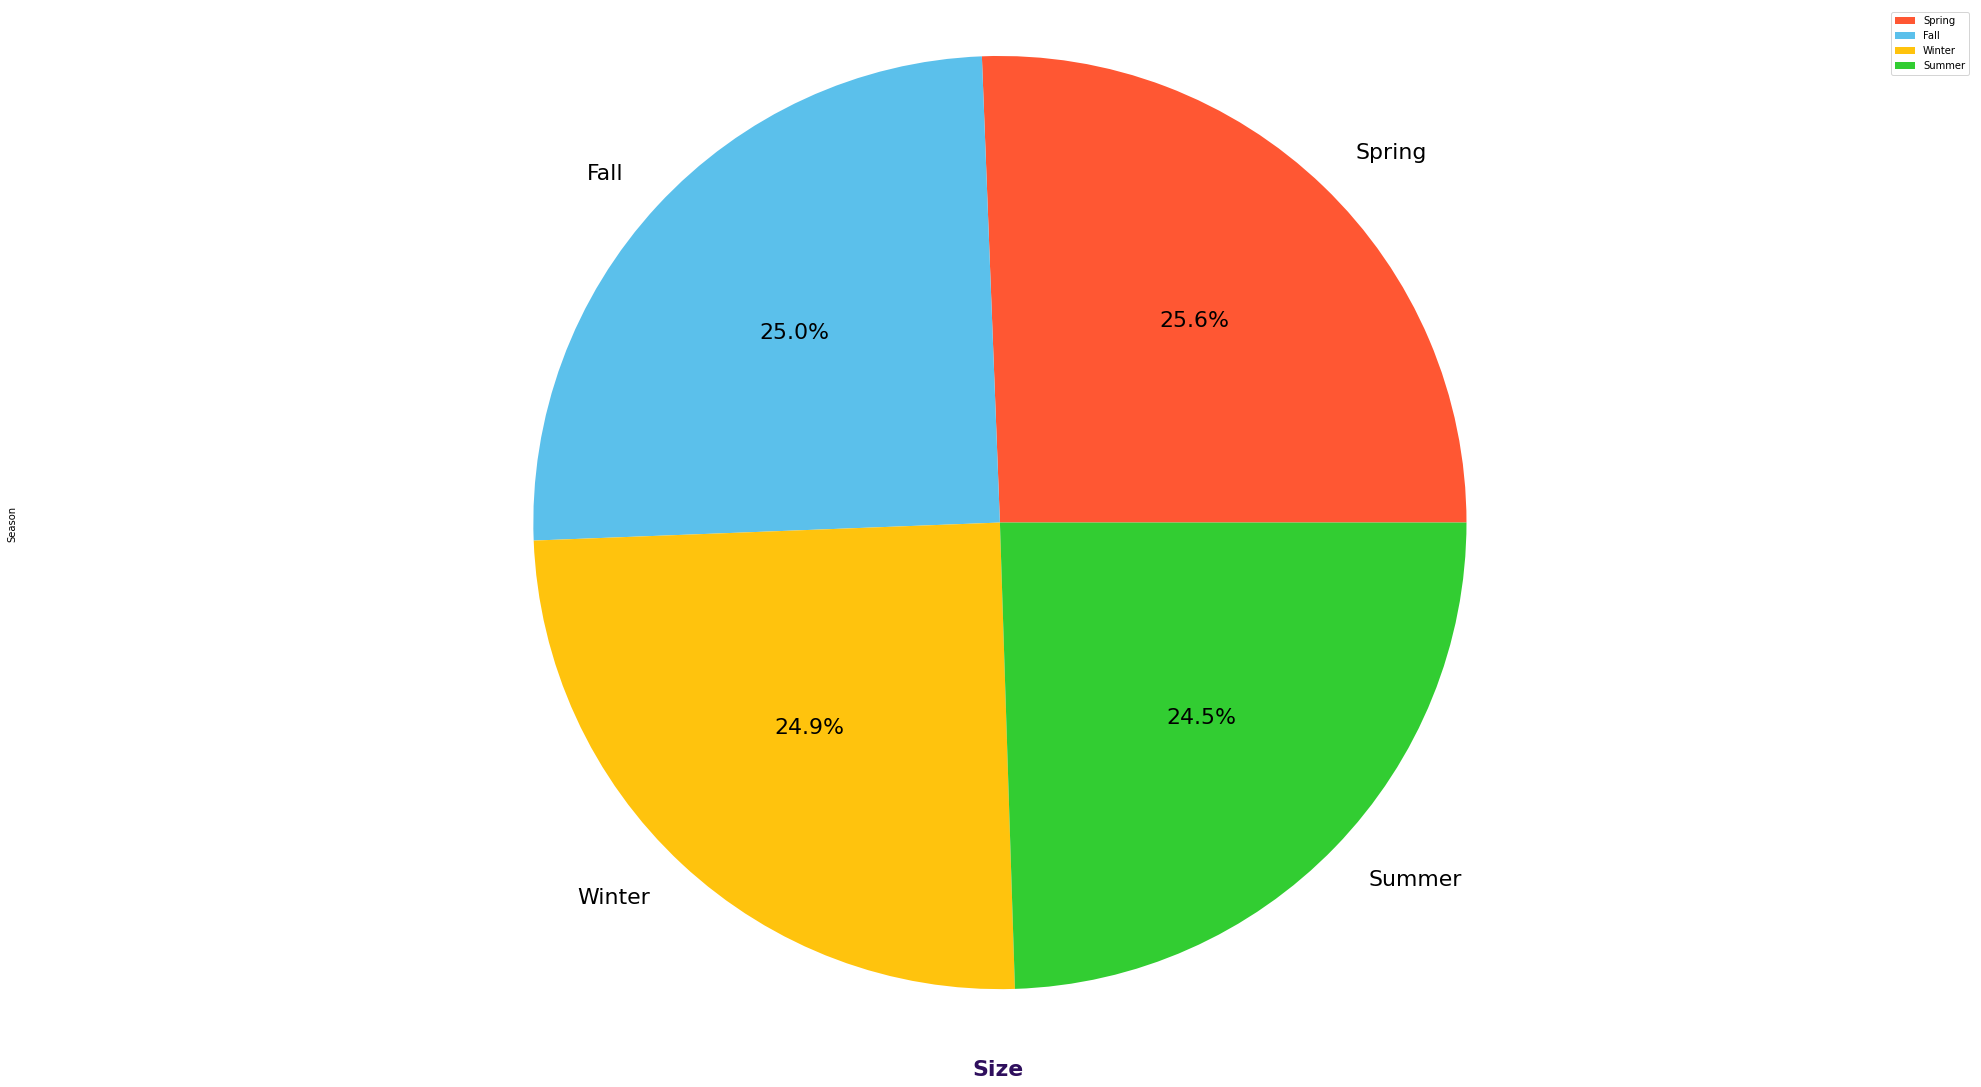

In [12]:
plt.figure(figsize = (35, 19))

counts = df["Season"].value_counts()
explode = (0, 0, 0, 0)

counts.plot(kind = 'pie', fontsize = 22, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 22, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [13]:
df["Payment Method"].value_counts()

PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Payment Method, dtype: int64

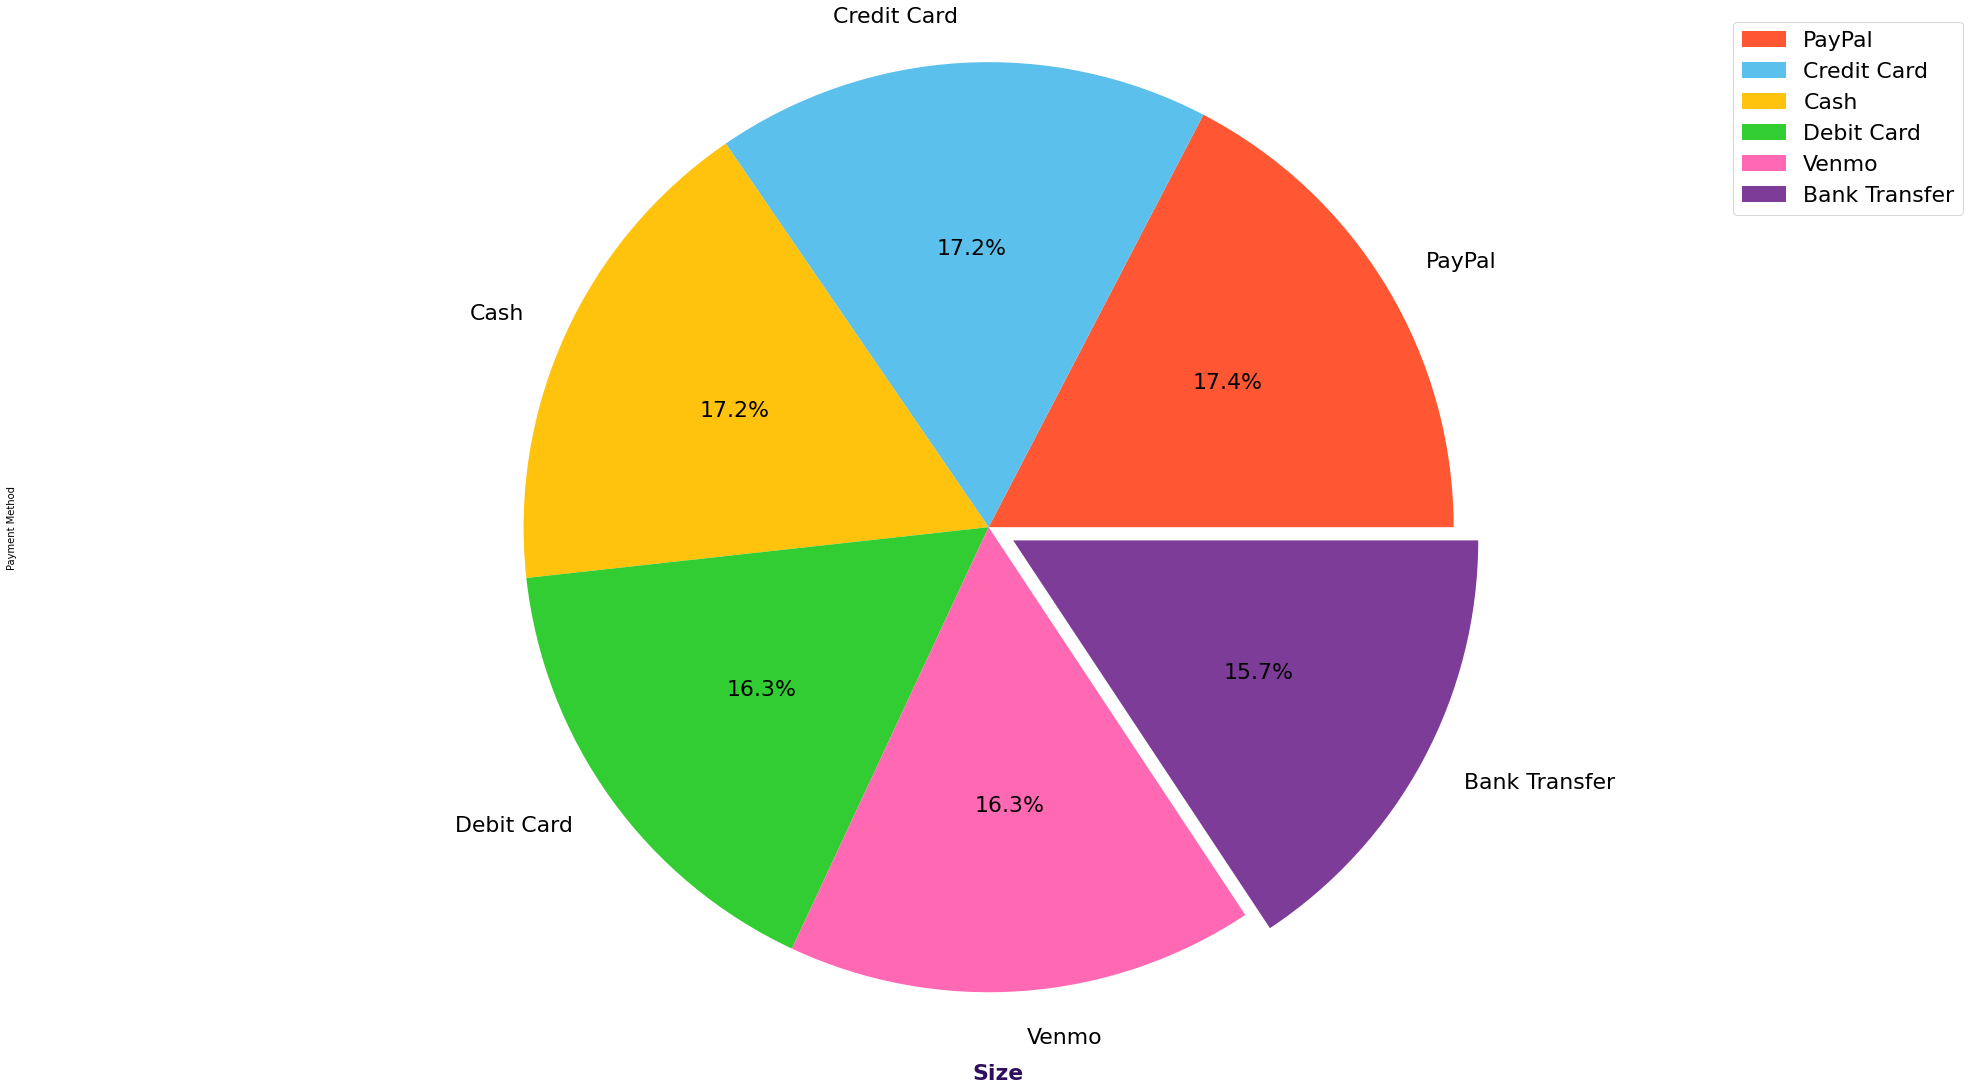

In [14]:
plt.figure(figsize = (35, 19))

counts = df["Payment Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 22, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 22, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best",fontsize=22)
plt.show()

In [15]:
def age_distribution(age):
    if age < 20:
        return '18-20'
    elif age < 30:
        return '20-30'
    elif age < 40:
        return '30-40'
    elif age < 50:
        return '40-50'
    elif age < 60:
        return '50-60'
    else:
        return '65+'
    
df['age_distribution'] = df['Age'].apply(age_distribution)
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,age_distribution
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,50-60
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,18-20
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50-60
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,20-30
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,40-50


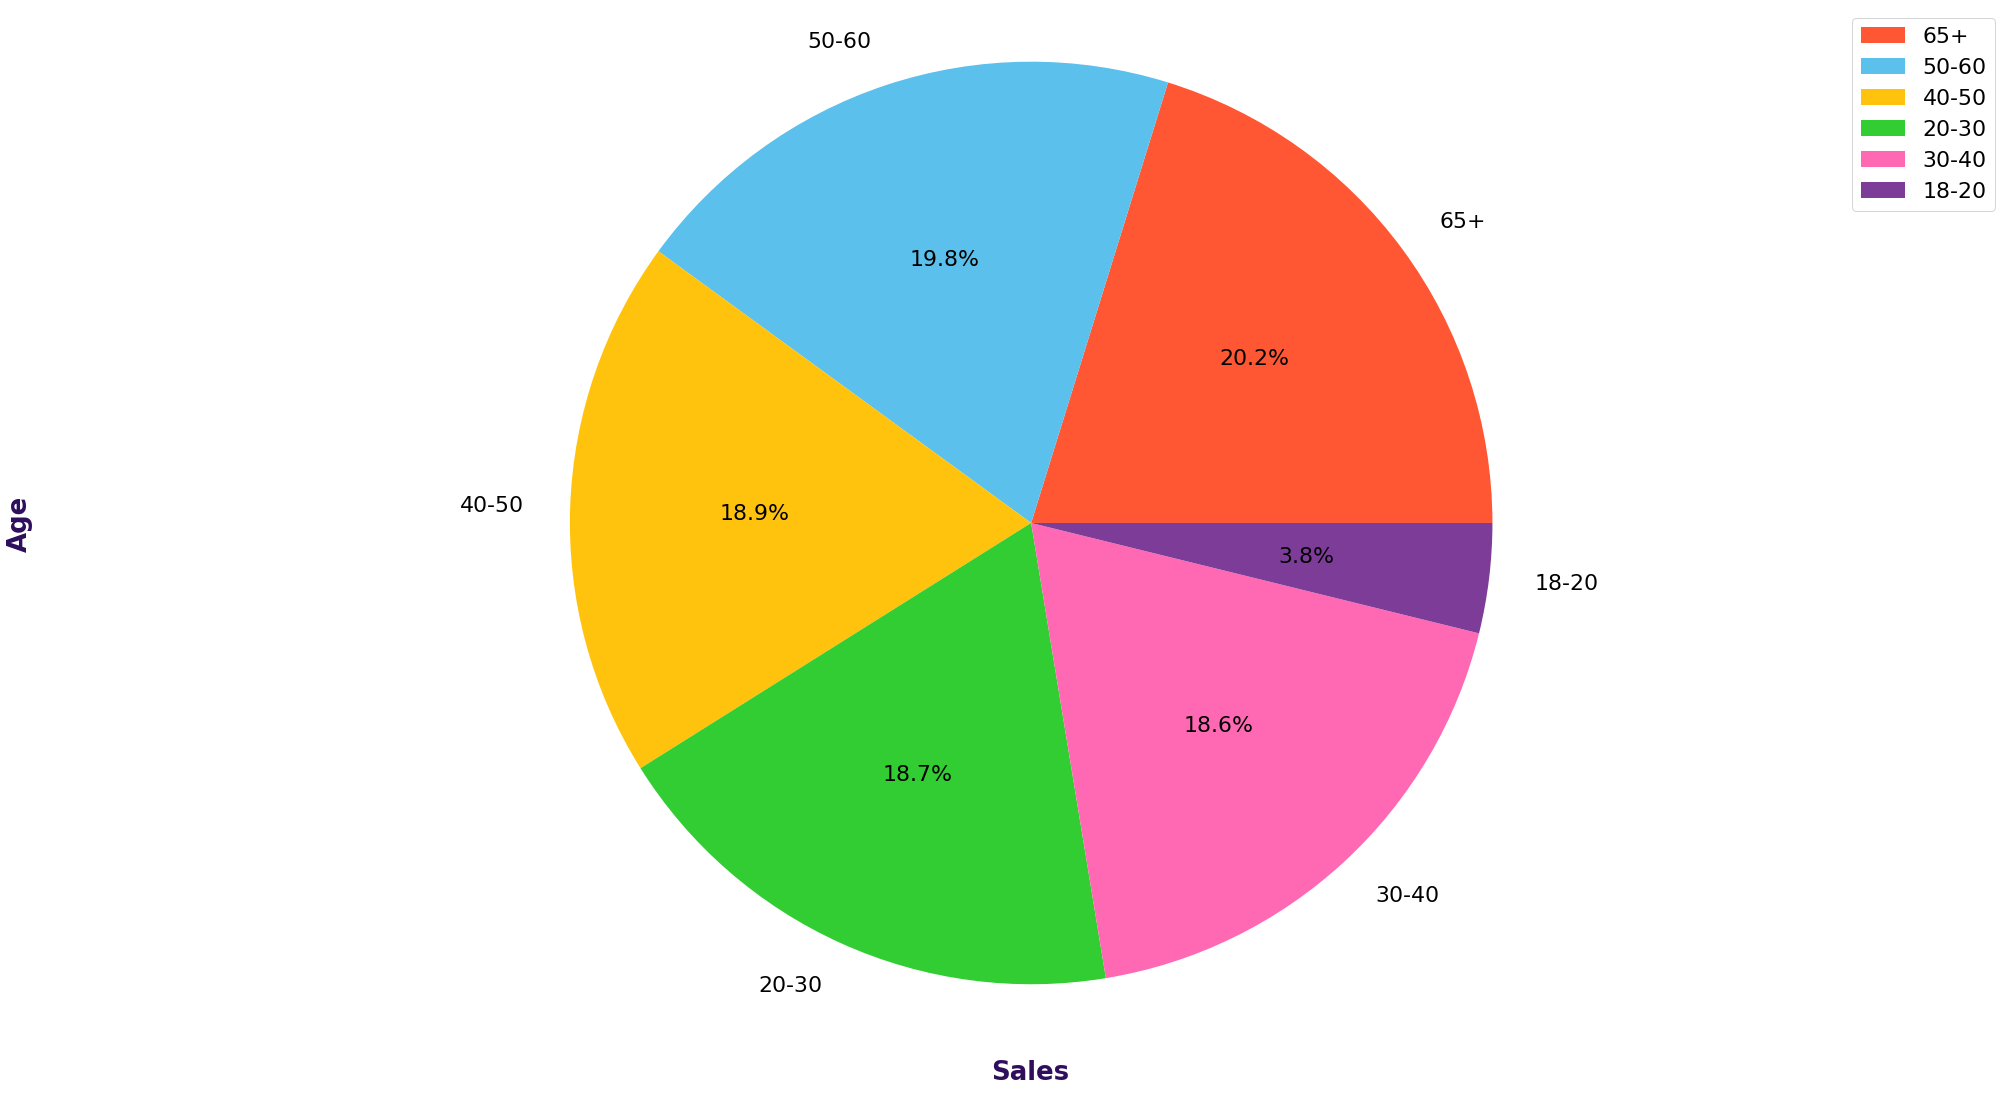

In [16]:
plt.figure(figsize = (35, 19))

counts = df["age_distribution"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 22, colors = colors, autopct = '%1.1f%%')
plt.ylabel('Age', weight = "bold", color = "#2F0F5D", fontsize = 26, labelpad = 20)
plt.xlabel('Sales', weight = "bold", color = "#2F0F5D", fontsize = 26, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best",fontsize= 22)
plt.show()

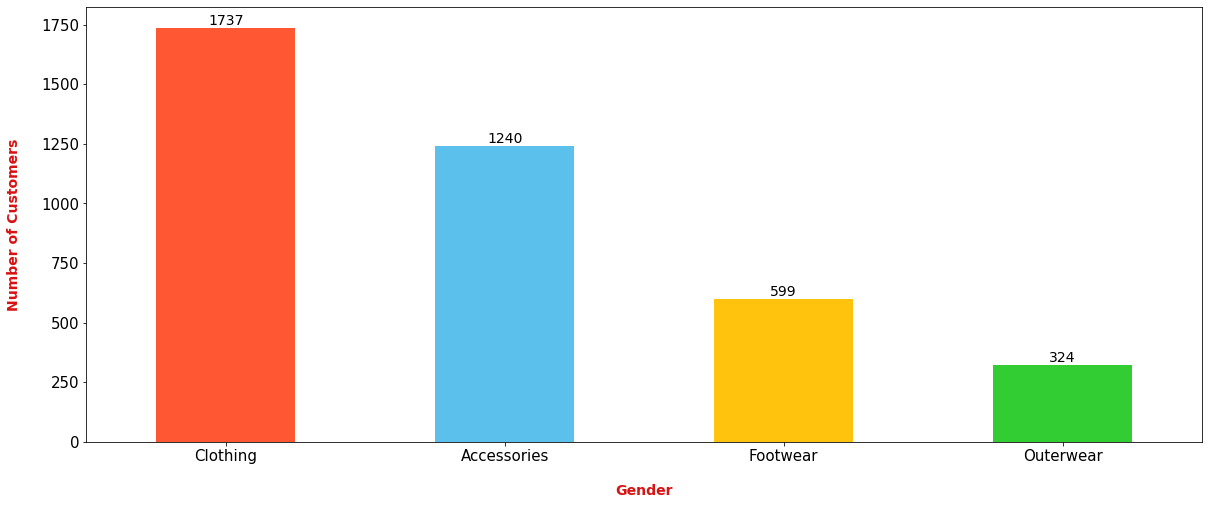

In [17]:
plt.figure(figsize = (20, 8))
ax = df["Category"].value_counts().plot(kind = 'bar', color = colors, rot = 0)

plt.xlabel('Gender', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Customers', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), fontsize = 14,ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

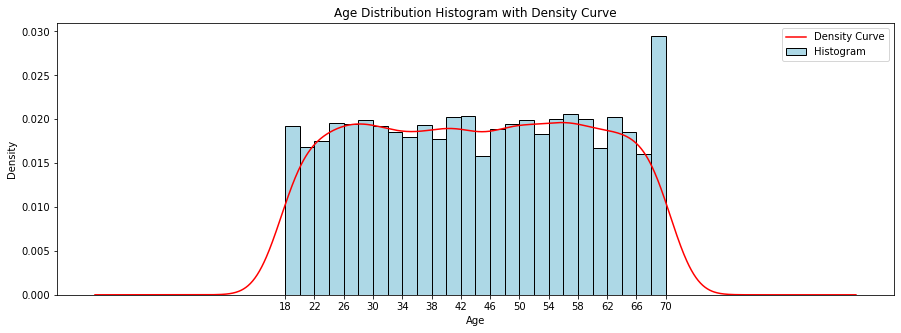

In [18]:
fig, ax = plt.subplots(figsize = (15, 5))

ax.hist(df['Age'], bins = 26, edgecolor = 'black', color = 'lightblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
step = 4
plt.xticks(range(int(df['Age'].min()), int(df['Age'].max()) + 1, step))

plt.show()

In [19]:
df['Frequency of Purchases'].value_counts()

Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: Frequency of Purchases, dtype: int64

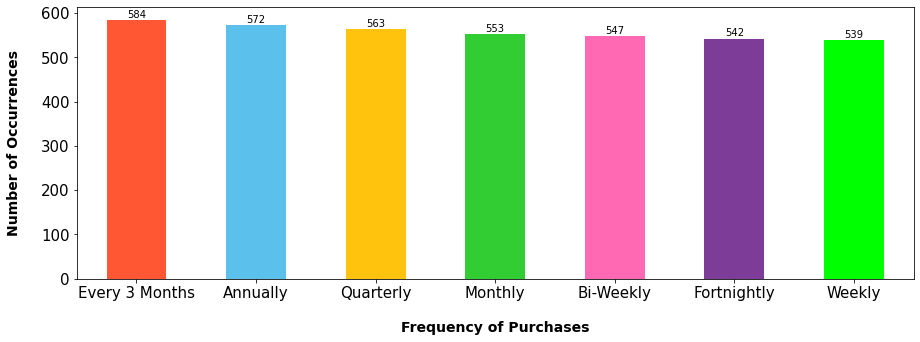

In [20]:
plt.figure(figsize = (15, 5))
ax = df["Frequency of Purchases"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly', 'Weekly'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Frequency of Purchases', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", fontsize = 14, labelpad = 20);

In [21]:
df['Subscription Status'].value_counts()

No     2847
Yes    1053
Name: Subscription Status, dtype: int64

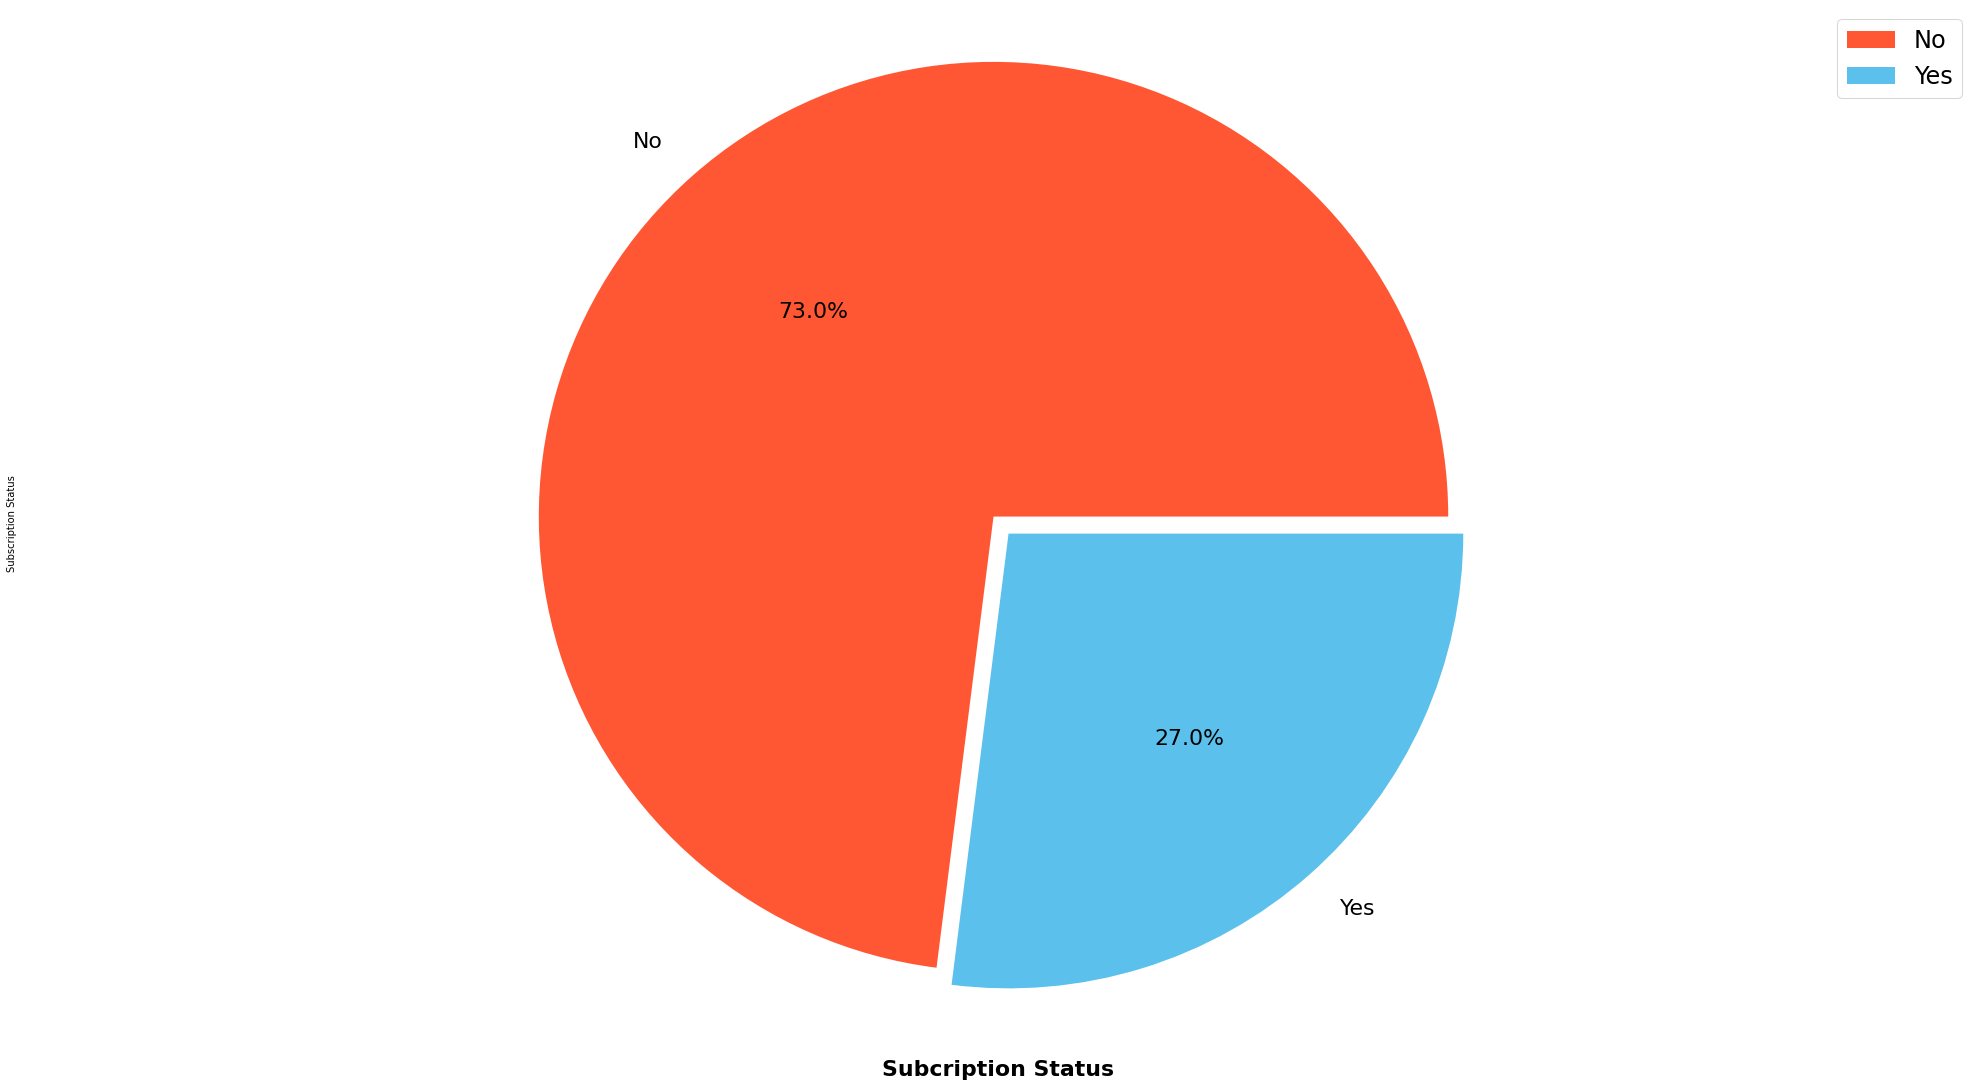

In [22]:
plt.figure(figsize = (35, 19))
counts = df["Subscription Status"].value_counts()
explode = (0, 0.05)

counts.plot(kind = 'pie', fontsize = 22, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Subcription Status', weight = "bold", fontsize = 22, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best",fontsize=24)
plt.show()

# Analysis

In [23]:
# What is the average age of customers in the dataset ?
average_age = df['Age'].mean()
print("Average Age:", average_age)

Average Age: 44.06846153846154


In [24]:
#What is the total purchase amount for each category ?
total_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Category:")
print(total_purchase_by_category)

Total Purchase Amount by Category:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


# Relationship between different elements and gender

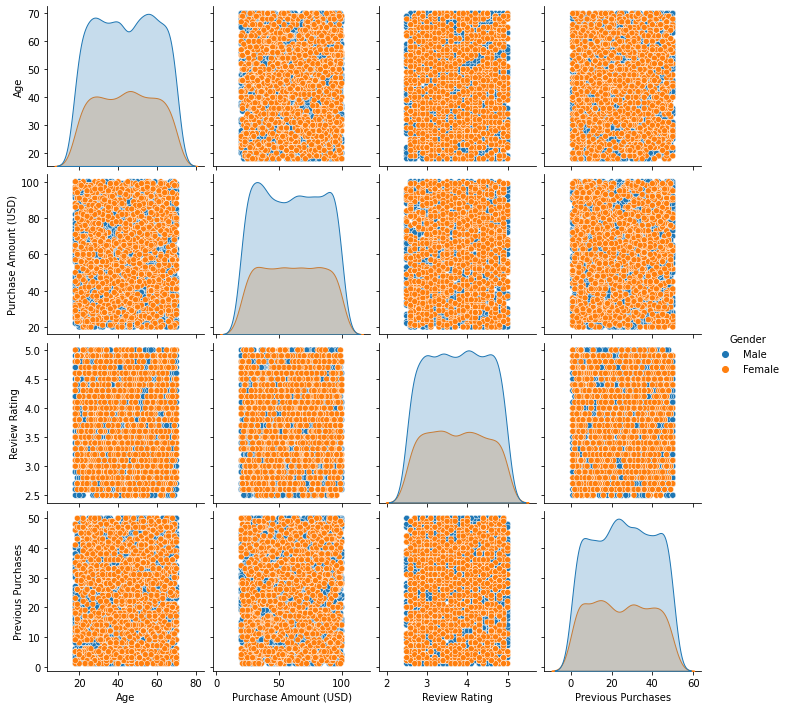

In [25]:
sns.pairplot(df,hue='Gender')

In [26]:
df_item = df['Item Purchased'].groupby(df['Gender']).value_counts(normalize= True).rename('frequency').to_frame().reset_index()
df_item

,Gender,Item Purchased,frequency
0,Female,Blouse,0.052885
1,Female,Sandals,0.047276
2,Female,Shirt,0.047276
3,Female,Handbag,0.046474
4,Female,Socks,0.046474
5,Female,Sunglasses,0.044872
6,Female,Belt,0.044071
7,Female,Jacket,0.043269
8,Female,Dress,0.041667
9,Female,Hat,0.041667


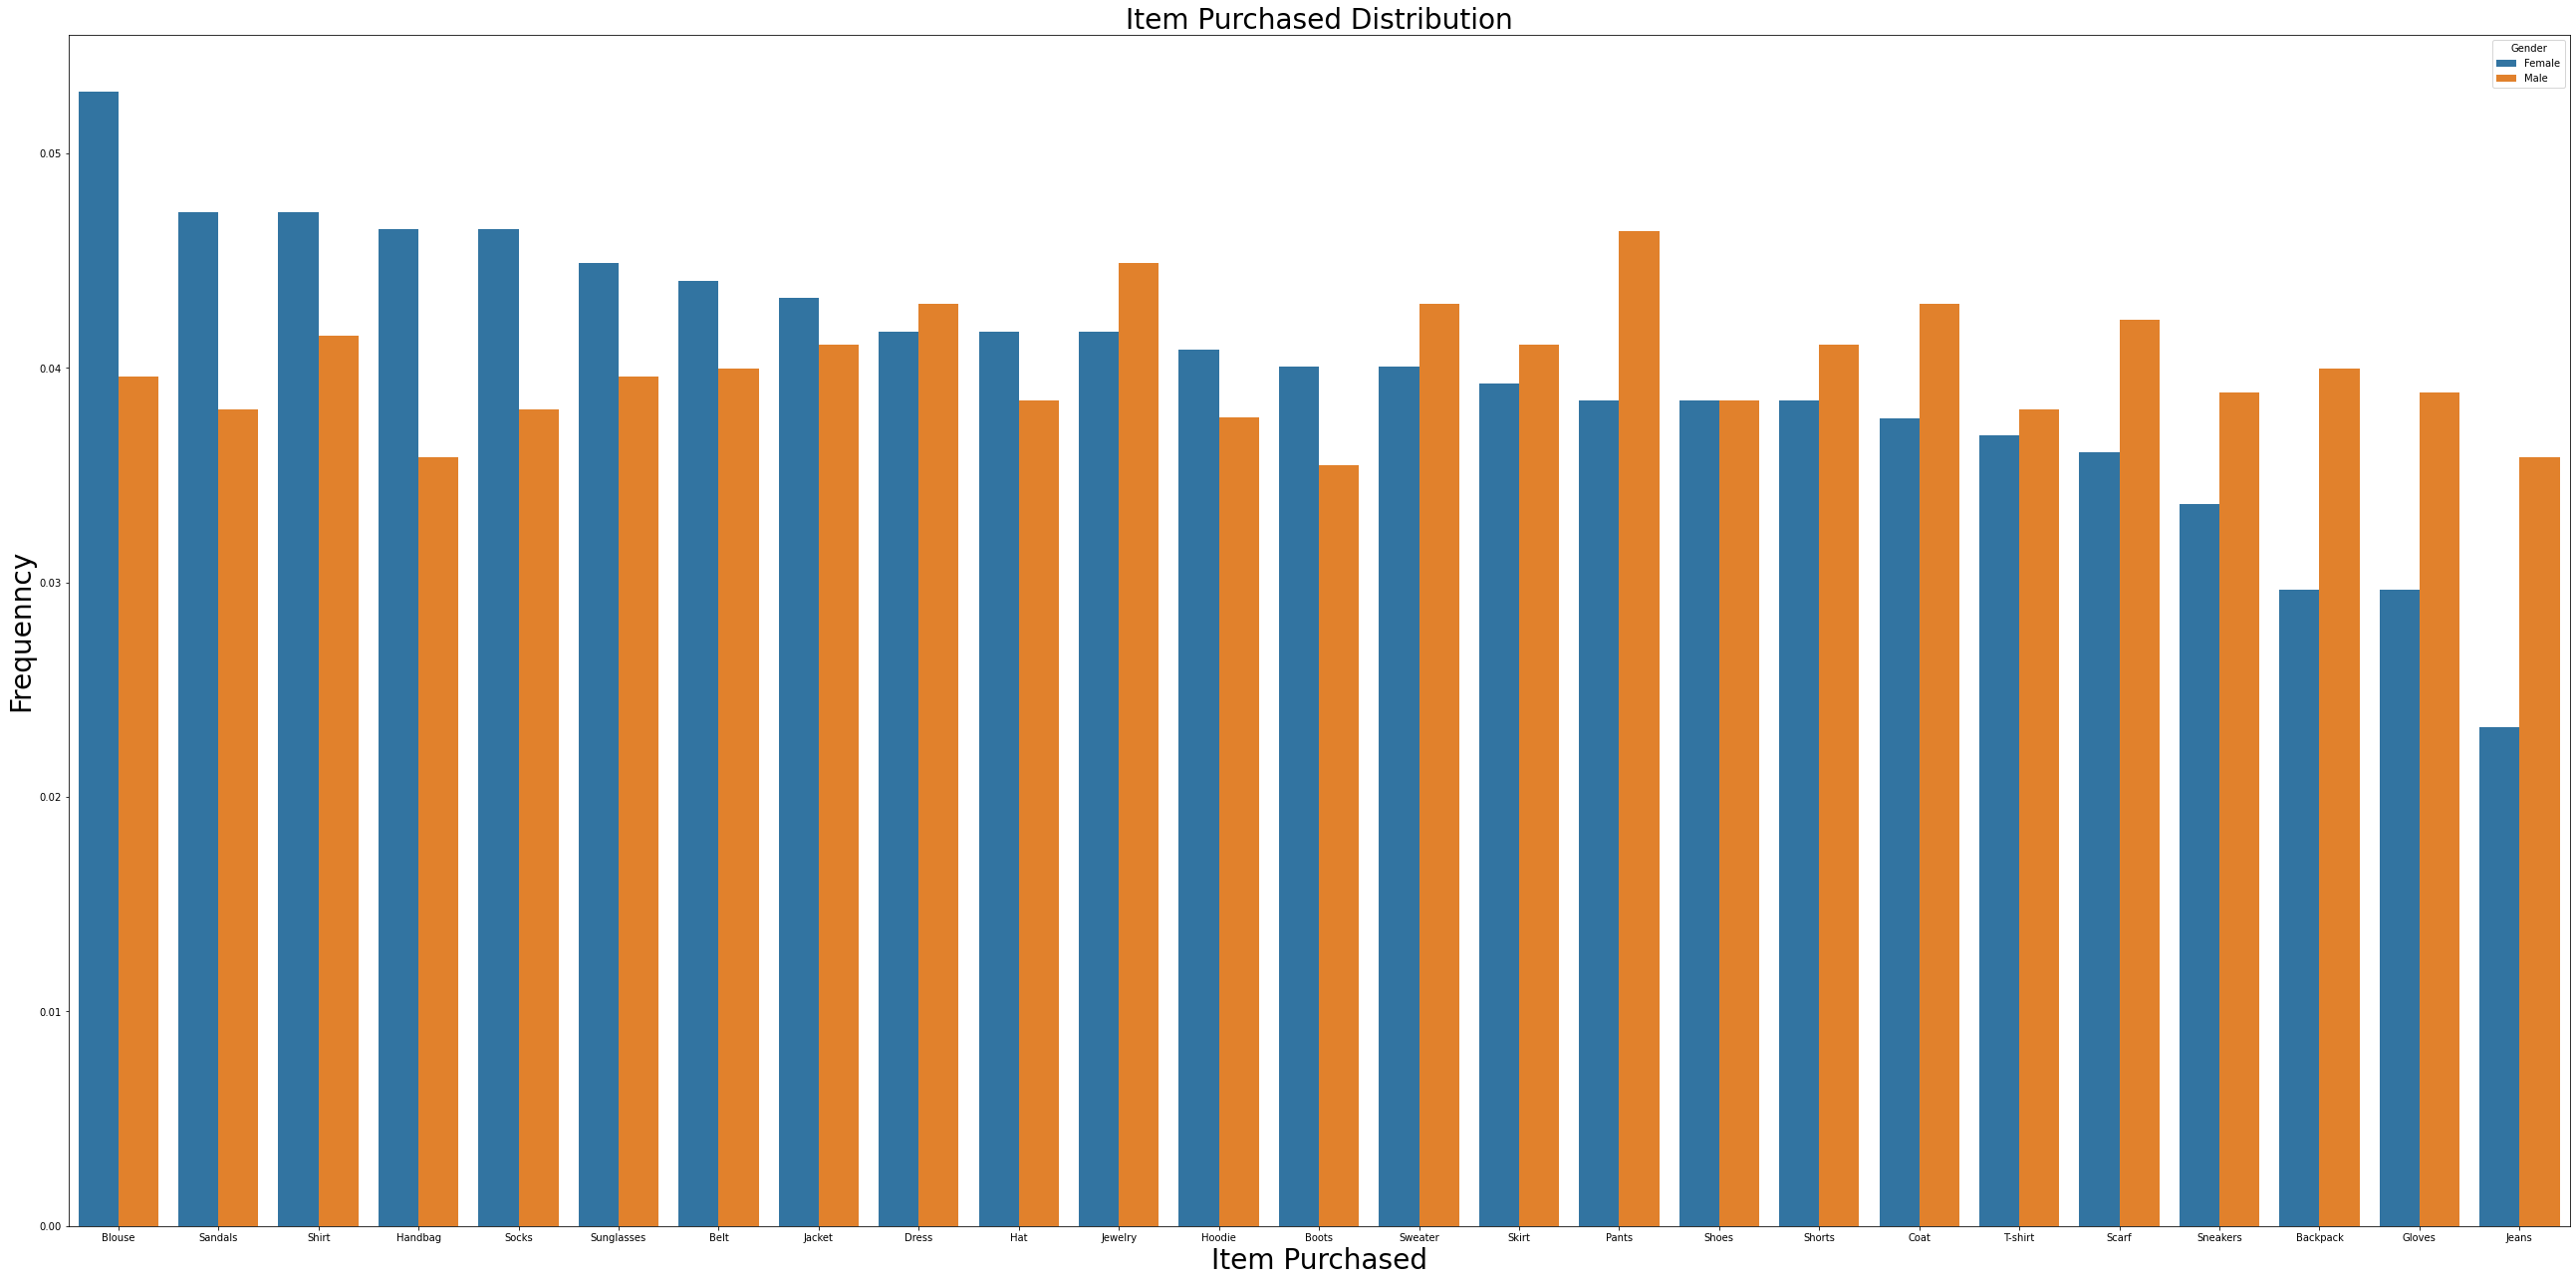

In [27]:
plt.figure(figsize = (45, 22))
sns.barplot(data = df_item,x='Item Purchased',y='frequency',hue='Gender')
plt.xlabel('Item Purchased',fontsize=28)
plt.ylabel('Frequenncy',fontsize=28)
plt.title("Item Purchased Distribution",fontsize=28);

<AxesSubplot:xlabel='Category', ylabel='count'>

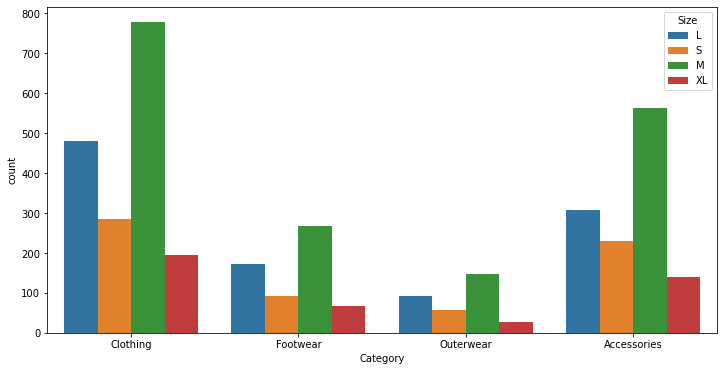

In [28]:
#Demand of different size in various categories
plt.figure(figsize = (12, 6))
sns.countplot(x='Category', hue='Size', data=df)


In [29]:
#What is the most common category for customers who shop in the Winter season ?
common_category_winter = df[df['Season'] == 'Winter']['Category'].mode()[0]
print("Most Common Category for Winter Season:", common_category_winter)

Most Common Category for Winter Season: Clothing
